## CVR for Each TA

---
####                               Weekly report

In [61]:
# libraries and data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

calendly = pd.read_csv('/Users/yuwei/Desktop/LoopApps/python code/CVR/csv_file/calendly0731.csv')
cvr = pd.read_csv('/Users/yuwei/Desktop/LoopApps/python code/CVR/csv_file/cvr_0731.csv')
cvr.iloc[8, 3] = 'Shwetha '

calendly1 = calendly.iloc[:, [0,3,5,9]]
calendly1 = calendly1.rename(index=str, columns={"User Name": "ta", "Invitee Email": "email", "Start Date & Time": "date"})
calendly1[['date', 'time', 'daynight']] = calendly1['date'].str.split(' ', expand=True)
calendly1 = calendly1.iloc[:, 0:4]
calendly1 = calendly1.sort_values(by='date')
cvr

,num_interviewed,num_sentcontract,num_active,ta
0,19,18,5,Alexanne Wagner
1,81,63,49,Allana Maunai
2,115,112,63,Danyal Naeem
3,187,142,98,Emily Malech
4,87,85,58,Jenna Li
5,1,0,1,Kevin Lee
6,132,114,75,Kiran Shahapur
7,75,74,49,Ravi Levens
8,92,86,49,Shwetha
9,61,56,37,Stanley Jia


In [62]:
total_registered = len(calendly1)
#calendly_register
calendly_register = calendly1.drop_duplicates(subset='email', keep='last')
num_registered = len(calendly_register)
#calendly_schedule
calendly_schedule = calendly_register.loc[calendly_register['Canceled'] == False]
num_scheduled = len(calendly_schedule)

print ("Total number of registered interview with duplication is {}.".format(total_registered))
print ("Total number of unique interviews registered is {}.".format(num_registered))
print ("Total number of interviews scheduled is {}.".format(num_scheduled))


Total number of registered interview with duplication is 2628.
Total number of unique interviews registered is 2109.
Total number of interviews scheduled is 1735.


In [63]:
#group by, From June 22 to July 22
register_eachta = calendly_register.groupby(['ta']).size().reset_index(name='registered')
schedule_eachta = calendly_schedule.groupby(['ta']).size().reset_index(name='scheduled')
rig_sch_eachta = register_eachta.merge(schedule_eachta, how = 'left', on = 'ta')
rig_sch_eachta
cvr_eachta = rig_sch_eachta.merge(cvr, how = 'outer', on = 'ta')
cvr_eachta = cvr_eachta.rename(columns = {"num_interviewed" : "interviewed", "num_sentcontract" : "sent", "num_active": "active"})
cvr_eachta_t = cvr_eachta.set_index('ta').T
cvr_eachta_t.insert(loc = 0, column = "ID",value = range(1,1+len(cvr_eachta_t)))
#cvr_eachta_t
cvr_eachta


,ta,registered,scheduled,interviewed,sent,active
0,Alexanne Wagner,37.0,30.0,19,18,5
1,Allana Maunai,109.0,99.0,81,63,49
2,Danyal Naeem,318.0,274.0,115,112,63
3,Emily Malech,332.0,284.0,187,142,98
4,Jenna Li,208.0,180.0,87,85,58
5,Kiran Shahapur,345.0,284.0,132,114,75
6,Ravi Levens,273.0,186.0,75,74,49
7,Shwetha,257.0,225.0,92,86,49
8,Stanley Jia,230.0,173.0,61,56,37
9,Kevin Lee,NaN,NaN,1,0,1


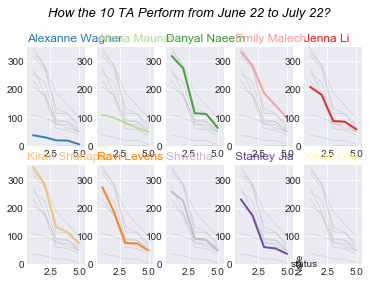

In [64]:
cvr_eachta_t.drop('ID', axis=1)
plt.style.use('seaborn-darkgrid')

palette = plt.get_cmap('Paired')
# multiple line plot
num=0
for column in cvr_eachta_t.drop('ID', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,5, num)
    
    # plot every groups, but discreet
    for v in cvr_eachta_t.drop('ID', axis=1):
        plt.plot(cvr_eachta_t['ID'], cvr_eachta_t[v], marker='', color='grey', linewidth=0.6, alpha=0.3)

    
    # Plot the lineplot
    plt.plot(cvr_eachta_t['ID'], cvr_eachta_t[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
    # Same limits for everybody!
    plt.xlim(0.5,5.5)
    plt.ylim(0,350)

    # Not ticks everywhere
    #if num in range(4) :
    #    plt.tick_params(labelbottom='off')
   #if num not in [1,4,7] :
   #     plt.tick_params(labelleft='off')
# Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    # general title
plt.suptitle("How the 10 TA Perform from June 22 to July 22?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis title
plt.text(0.5, 0.02, 'status', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')
plt.savefig('overall.png')

In [65]:
#graph for each TA
# Make a data frame
df = cvr_eachta_t

#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')
#plt.style.use('ggplot')

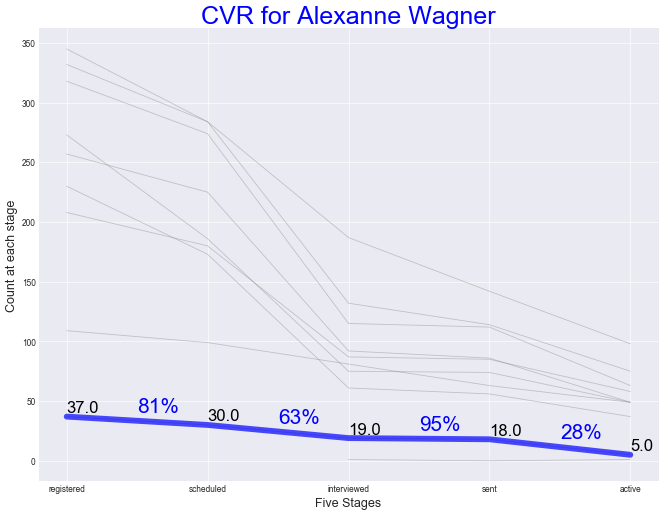

In [66]:
#For Alexanne Wagner	37.0	30.0	19	18	5

my_dpi = 60
fig = plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
point_fig = fig.add_subplot(111)

fig_xticks = df.index.values

# multiple line plot
for column in df.drop('ID', axis=1):
   plt.xticks(df['ID'], fig_xticks)
   plt.plot(df['ID'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.xticks(df['ID'], fig_xticks)
plt.plot(df['ID'], df['Alexanne Wagner'], marker='', color='blue', linewidth=7, alpha=0.7)

# position of number_fields
point_pos = list(zip(df['ID'], df['Alexanne Wagner']))

# rate values
rate = []
for i in range(0, len(df['Alexanne Wagner']) - 1):
    rate.append(df['Alexanne Wagner'][i + 1] / df['Alexanne Wagner'][i])

# position of rate, which is the middle point of two adjacent number_fields
rate_pos = []
for i in range(0, len(point_pos) - 1):
    x1, y1 = point_pos[i]
    x2, y2 = point_pos[i + 1]
    rate_pos.append([(x1 + x2) / 2, (y1 + y2) / 2])
    
for xy in point_pos:
    point_fig.annotate('{0}'.format(xy[1]), xy=xy, xytext=(0.1, 5),
                       color='black', fontsize=20, textcoords='offset points')
for i, xy in enumerate(rate_pos):
    point_fig.annotate('{0:.0f}%'.format(rate[i] * 100), xy=xy, xytext=(0.1, 10),
                       color='blue', fontsize=25,textcoords='offset points')
 
# Change xlim
plt.xlim(0.8,5.2)

# Add titles
plt.title("CVR for Alexanne Wagner", fontsize=30, fontweight=0, color='blue')
plt.xlabel("Five Stages",fontsize=15)
plt.ylabel("Count at each stage", fontsize=15)
plt.savefig('CVR for Alexanne Wagner')

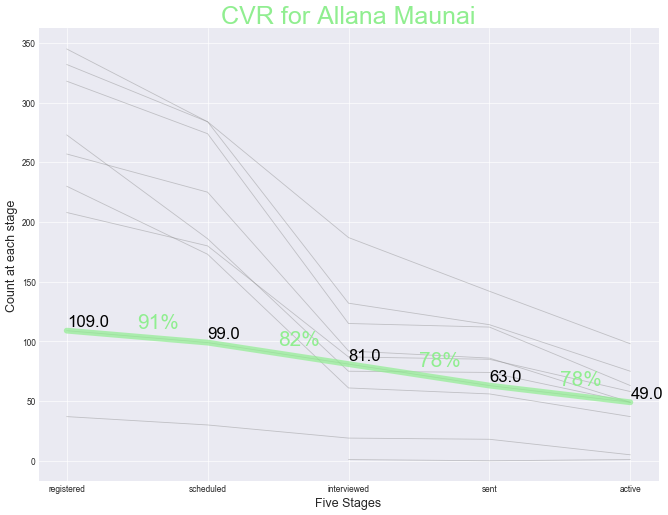

In [67]:
#Allana Maunai	109.0	99.0	81	63	49

my_dpi = 60
fig = plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
point_fig = fig.add_subplot(111)

fig_xticks = df.index.values

# multiple line plot
for column in df.drop('ID', axis=1):
   plt.xticks(df['ID'], fig_xticks)
   plt.plot(df['ID'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.xticks(df['ID'], fig_xticks)
plt.plot(df['ID'], df['Allana Maunai'], marker='', color='lightgreen', linewidth=7, alpha=0.7)

# position of number_fields
point_pos = list(zip(df['ID'], df['Allana Maunai']))

# rate values
rate = []
for i in range(0, len(df['Allana Maunai']) - 1):
    rate.append(df['Allana Maunai'][i + 1] / df['Allana Maunai'][i])

# position of rate, which is the middle point of two adjacent number_fields
rate_pos = []
for i in range(0, len(point_pos) - 1):
    x1, y1 = point_pos[i]
    x2, y2 = point_pos[i + 1]
    rate_pos.append([(x1 + x2) / 2, (y1 + y2) / 2])
    
for xy in point_pos:
    point_fig.annotate('{0}'.format(xy[1]), xy=xy, xytext=(0.1, 5),
                       color='black', fontsize=20, textcoords='offset points')
for i, xy in enumerate(rate_pos):
    point_fig.annotate('{0:.0f}%'.format(rate[i] * 100), xy=xy, xytext=(0.1, 10),
                       color='lightgreen', fontsize=25,textcoords='offset points')
 
# Change xlim
plt.xlim(0.8,5.2)

# Add titles
plt.title("CVR for Allana Maunai", fontsize=30, fontweight=0, color='lightgreen')
plt.xlabel("Five Stages",fontsize=15)
plt.ylabel("Count at each stage", fontsize=15)
plt.savefig('CVR for Allana Maunai')

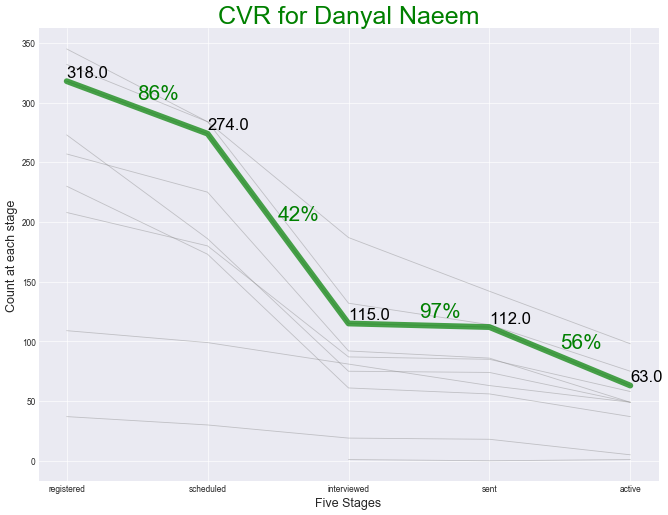

In [68]:
#Danyal Naeem	318.0	274.0	115	112	63

my_dpi = 60
fig = plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
point_fig = fig.add_subplot(111)

fig_xticks = df.index.values

# multiple line plot
for column in df.drop('ID', axis=1):
   plt.xticks(df['ID'], fig_xticks)
   plt.plot(df['ID'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.xticks(df['ID'], fig_xticks)
plt.plot(df['ID'], df['Danyal Naeem'], marker='', color='green', linewidth=7, alpha=0.7)

# position of number_fields
point_pos = list(zip(df['ID'], df['Danyal Naeem']))

# rate values
rate = []
for i in range(0, len(df['Danyal Naeem']) - 1):
    rate.append(df['Danyal Naeem'][i + 1] / df['Danyal Naeem'][i])

# position of rate, which is the middle point of two adjacent number_fields
rate_pos = []
for i in range(0, len(point_pos) - 1):
    x1, y1 = point_pos[i]
    x2, y2 = point_pos[i + 1]
    rate_pos.append([(x1 + x2) / 2, (y1 + y2) / 2])
    
for xy in point_pos:
    point_fig.annotate('{0}'.format(xy[1]), xy=xy, xytext=(0.1, 5),
                       color='black', fontsize=20, textcoords='offset points')
for i, xy in enumerate(rate_pos):
    point_fig.annotate('{0:.0f}%'.format(rate[i] * 100), xy=xy, xytext=(0.1, 10),
                       color='green', fontsize=25,textcoords='offset points')
 
# Change xlim
plt.xlim(0.8,5.2)

# Add titles
plt.title("CVR for Danyal Naeem", fontsize=30, fontweight=0, color='green')
plt.xlabel("Five Stages",fontsize=15)
plt.ylabel("Count at each stage", fontsize=15)
plt.savefig('CVR for Danyal Naeem')

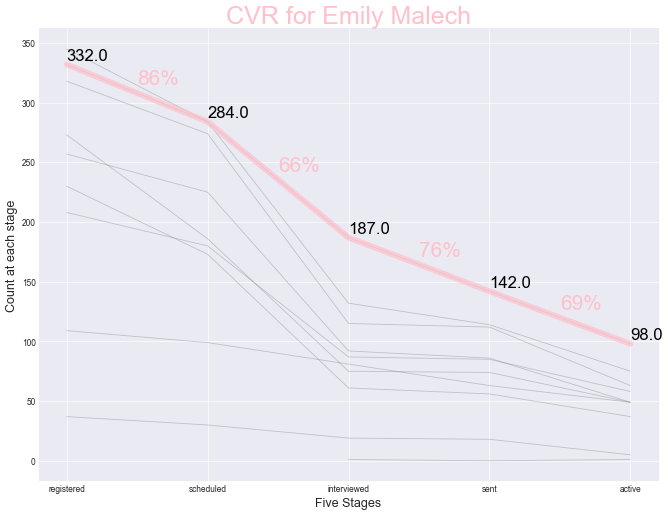

In [69]:
#Emily Malech	332.0	284.0	187	142	98
my_dpi = 60
fig = plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
point_fig = fig.add_subplot(111)

fig_xticks = df.index.values

for column in df.drop('ID', axis=1):
   plt.xticks(df['ID'], fig_xticks)
   plt.plot(df['ID'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.xticks(df['ID'], fig_xticks)
plt.plot(df['ID'], df['Emily Malech'], marker='', color='pink', linewidth=7, alpha=0.7)

# position of number_fields
point_pos = list(zip(df['ID'], df['Emily Malech']))

# rate values
rate = []
for i in range(0, len(df['Emily Malech']) - 1):
    rate.append(df['Emily Malech'][i + 1] / df['Emily Malech'][i])

# position of rate, which is the middle point of two adjacent number_fields
rate_pos = []
for i in range(0, len(point_pos) - 1):
    x1, y1 = point_pos[i]
    x2, y2 = point_pos[i + 1]
    rate_pos.append([(x1 + x2) / 2, (y1 + y2) / 2])
    
for xy in point_pos:
    point_fig.annotate('{0}'.format(xy[1]), xy=xy, xytext=(0.1, 5),
                       color='black', fontsize=20, textcoords='offset points')
for i, xy in enumerate(rate_pos):
    point_fig.annotate('{0:.0f}%'.format(rate[i] * 100), xy=xy, xytext=(0.1, 10),
                       color='pink', fontsize=25,textcoords='offset points')
 
# Change xlim
plt.xlim(0.8,5.2)

# Add titles
plt.title("CVR for Emily Malech", fontsize=30, fontweight=0, color='pink')
plt.xlabel("Five Stages",fontsize=15)
plt.ylabel("Count at each stage", fontsize=15)
plt.savefig('CVR for Emily Malech')



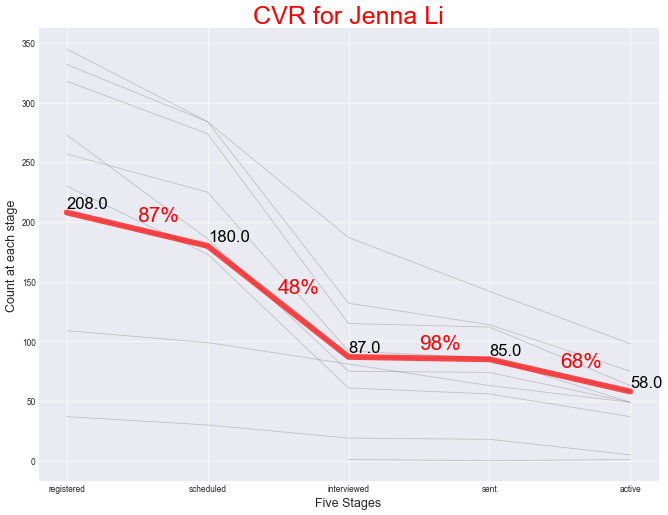

In [70]:
# Jenna Li	208.0	180.0	87	85	58
my_dpi = 60
fig = plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
point_fig = fig.add_subplot(111)

fig_xticks = df.index.values

# multiple line plot
for column in df.drop('ID', axis=1):
   plt.xticks(df['ID'], fig_xticks)
   plt.plot(df['ID'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.xticks(df['ID'], fig_xticks)
plt.plot(df['ID'], df['Jenna Li'], marker='', color='red', linewidth=7, alpha=0.7)

# position of number_fields
point_pos = list(zip(df['ID'], df['Jenna Li']))

# rate values
rate = []
for i in range(0, len(df['Jenna Li']) - 1):
    rate.append(df['Jenna Li'][i + 1] / df['Jenna Li'][i])

# position of rate, which is the middle point of two adjacent number_fields
rate_pos = []
for i in range(0, len(point_pos) - 1):
    x1, y1 = point_pos[i]
    x2, y2 = point_pos[i + 1]
    rate_pos.append([(x1 + x2) / 2, (y1 + y2) / 2])
    
for xy in point_pos:
    point_fig.annotate('{0}'.format(xy[1]), xy=xy, xytext=(0.1, 5),
                       color='black', fontsize=20, textcoords='offset points')
for i, xy in enumerate(rate_pos):
    point_fig.annotate('{0:.0f}%'.format(rate[i] * 100), xy=xy, xytext=(0.1, 10),
                       color='red', fontsize=25,textcoords='offset points')
 
# Change xlim
plt.xlim(0.8,5.2)

# Add titles
plt.title("CVR for Jenna Li", fontsize=30, fontweight=0, color='red')
plt.xlabel("Five Stages",fontsize=15)
plt.ylabel("Count at each stage", fontsize=15)
plt.savefig('CVR for Jenna Li')



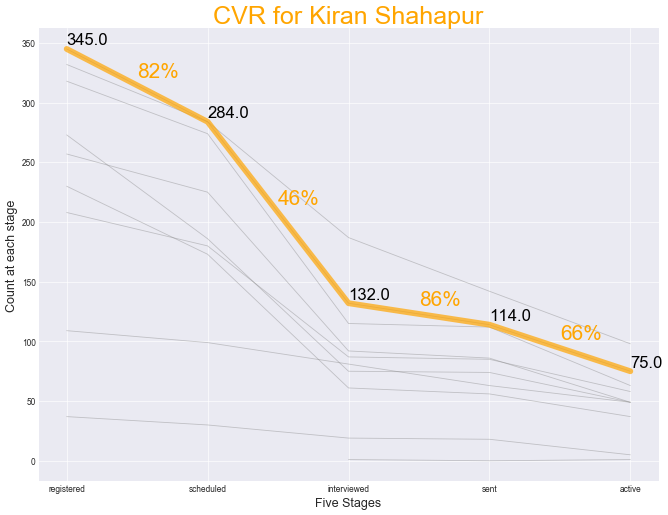

In [71]:
#Kiran Shahapur	345.0	284.0	132	114	75

my_dpi = 60
fig = plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
point_fig = fig.add_subplot(111)

fig_xticks = df.index.values

# multiple line plot
for column in df.drop('ID', axis=1):
   plt.xticks(df['ID'], fig_xticks)
   plt.plot(df['ID'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.xticks(df['ID'], fig_xticks)
plt.plot(df['ID'], df['Kiran Shahapur'], marker='', color='orange', linewidth=7, alpha=0.7)

# position of number_fields
point_pos = list(zip(df['ID'], df['Kiran Shahapur']))

# rate values
rate = []
for i in range(0, len(df['Kiran Shahapur']) - 1):
    rate.append(df['Kiran Shahapur'][i + 1] / df['Kiran Shahapur'][i])

# position of rate, which is the middle point of two adjacent number_fields
rate_pos = []
for i in range(0, len(point_pos) - 1):
    x1, y1 = point_pos[i]
    x2, y2 = point_pos[i + 1]
    rate_pos.append([(x1 + x2) / 2, (y1 + y2) / 2])
    
for xy in point_pos:
    point_fig.annotate('{0}'.format(xy[1]), xy=xy, xytext=(0.1, 5),
                       color='black', fontsize=20, textcoords='offset points')
for i, xy in enumerate(rate_pos):
    point_fig.annotate('{0:.0f}%'.format(rate[i] * 100), xy=xy, xytext=(0.1, 10),
                       color='orange', fontsize=25,textcoords='offset points')
 
# Change xlim
plt.xlim(0.8,5.2)

# Add titles
plt.title("CVR for Kiran Shahapur", fontsize=30, fontweight=0, color='orange')
plt.xlabel("Five Stages",fontsize=15)
plt.ylabel("Count at each stage", fontsize=15)
plt.savefig('CVR for Kiran Shahapur')



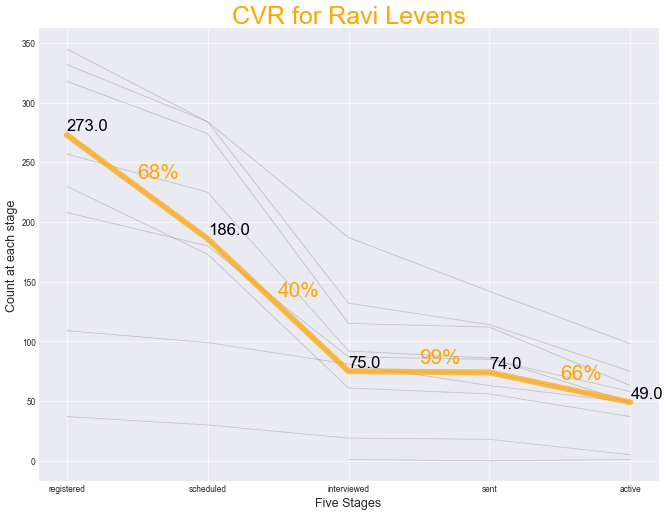

In [72]:
#Ravi Levens	273.0	186.0	75	74	49

my_dpi = 60
fig = plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
point_fig = fig.add_subplot(111)

fig_xticks = df.index.values

# multiple line plot
for column in df.drop('ID', axis=1):
   plt.xticks(df['ID'], fig_xticks)
   plt.plot(df['ID'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.xticks(df['ID'], fig_xticks)
plt.plot(df['ID'], df['Ravi Levens'], marker='', color='orange', linewidth=7, alpha=0.7)

# position of number_fields
point_pos = list(zip(df['ID'], df['Ravi Levens']))

# rate values
rate = []
for i in range(0, len(df['Ravi Levens']) - 1):
    rate.append(df['Ravi Levens'][i + 1] / df['Ravi Levens'][i])

# position of rate, which is the middle point of two adjacent number_fields
rate_pos = []
for i in range(0, len(point_pos) - 1):
    x1, y1 = point_pos[i]
    x2, y2 = point_pos[i + 1]
    rate_pos.append([(x1 + x2) / 2, (y1 + y2) / 2])
    
for xy in point_pos:
    point_fig.annotate('{0}'.format(xy[1]), xy=xy, xytext=(0.1, 5),
                       color='black', fontsize=20, textcoords='offset points')
for i, xy in enumerate(rate_pos):
    point_fig.annotate('{0:.0f}%'.format(rate[i] * 100), xy=xy, xytext=(0.1, 10),
                       color='orange', fontsize=25,textcoords='offset points')
 
# Change xlim
plt.xlim(0.8,5.2)

# Add titles
plt.title("CVR for Ravi Levens", fontsize=30, fontweight=0, color='orange')
plt.xlabel("Five Stages",fontsize=15)
plt.ylabel("Count at each stage", fontsize=15)
plt.savefig('CVR for Ravi Levens')



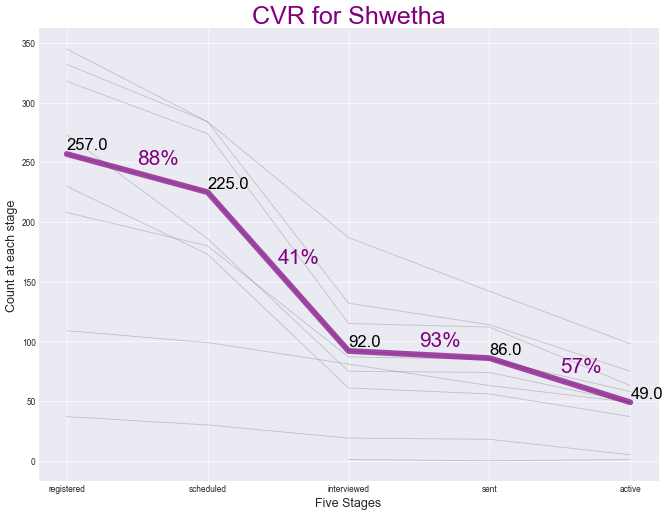

In [73]:
#Shwetha	257.0	225.0	92	86	49

my_dpi = 60
fig = plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
point_fig = fig.add_subplot(111)

fig_xticks = df.index.values

# multiple line plot
for column in df.drop('ID', axis=1):
   plt.xticks(df['ID'], fig_xticks)
   plt.plot(df['ID'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.xticks(df['ID'], fig_xticks)
plt.plot(df['ID'], df['Shwetha '], marker='', color='purple', linewidth=7, alpha=0.7)

# position of number_fields
point_pos = list(zip(df['ID'], df['Shwetha ']))

# rate values
rate = []
for i in range(0, len(df['Shwetha ']) - 1):
    rate.append(df['Shwetha '][i + 1] / df['Shwetha '][i])

# position of rate, which is the middle point of two adjacent number_fields
rate_pos = []
for i in range(0, len(point_pos) - 1):
    x1, y1 = point_pos[i]
    x2, y2 = point_pos[i + 1]
    rate_pos.append([(x1 + x2) / 2, (y1 + y2) / 2])
    
for xy in point_pos:
    point_fig.annotate('{0}'.format(xy[1]), xy=xy, xytext=(0.1, 5),
                       color='black', fontsize=20, textcoords='offset points')
for i, xy in enumerate(rate_pos):
    point_fig.annotate('{0:.0f}%'.format(rate[i] * 100), xy=xy, xytext=(0.1, 10),
                       color='purple', fontsize=25,textcoords='offset points')
 
# Change xlim
plt.xlim(0.8,5.2)

# Add titles
plt.title("CVR for Shwetha", fontsize=30, fontweight=0, color='purple')
plt.xlabel("Five Stages",fontsize=15)
plt.ylabel("Count at each stage", fontsize=15)
plt.savefig('CVR for Shwetha')



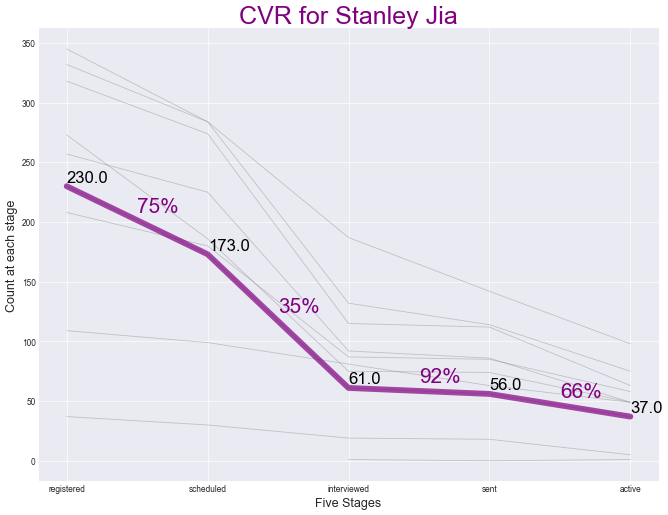

In [74]:
#Stanley Jia	230.0	173.0	61	56	37

my_dpi = 60
fig = plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
point_fig = fig.add_subplot(111)

fig_xticks = df.index.values

# multiple line plot
for column in df.drop('ID', axis=1):
   plt.xticks(df['ID'], fig_xticks)
   plt.plot(df['ID'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.xticks(df['ID'], fig_xticks)
plt.plot(df['ID'], df['Stanley Jia'], marker='', color='purple', linewidth=7, alpha=0.7)

# position of number_fields
point_pos = list(zip(df['ID'], df['Stanley Jia']))

# rate values
rate = []
for i in range(0, len(df['Stanley Jia']) - 1):
    rate.append(df['Stanley Jia'][i + 1] / df['Stanley Jia'][i])

# position of rate, which is the middle point of two adjacent number_fields
rate_pos = []
for i in range(0, len(point_pos) - 1):
    x1, y1 = point_pos[i]
    x2, y2 = point_pos[i + 1]
    rate_pos.append([(x1 + x2) / 2, (y1 + y2) / 2])
    
for xy in point_pos:
    point_fig.annotate('{0}'.format(xy[1]), xy=xy, xytext=(0.1, 5),
                       color='black', fontsize=20, textcoords='offset points')
for i, xy in enumerate(rate_pos):
    point_fig.annotate('{0:.0f}%'.format(rate[i] * 100), xy=xy, xytext=(0.1, 10),
                       color='purple', fontsize=25,textcoords='offset points')
 
# Change xlim
plt.xlim(0.8,5.2)

# Add titles
plt.title("CVR for Stanley Jia", fontsize=30, fontweight=0, color='purple')
plt.xlabel("Five Stages",fontsize=15)
plt.ylabel("Count at each stage", fontsize=15)
plt.savefig('CVR for Stanley Jia')


